In [8]:
from networks import CNNRegressor
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dataloader import MultimodalDataset
from networks import FullyConnectedNetwork


Load in split data

In [9]:
data_dict = torch.load("processed_features.pt")
data_dict2 = torch.load("processed_features2.pt")

In [10]:
model = CNNRegressor(1)
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

checkpoint = torch.load("model_checkpoints/image_model.pt")
print(checkpoint.keys())
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
val_loss = checkpoint['validation_loss']
train_loss = checkpoint['training_loss']
epochs = checkpoint['epoch']

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'training_loss', 'validation_loss'])


Final validation loss: 201.49


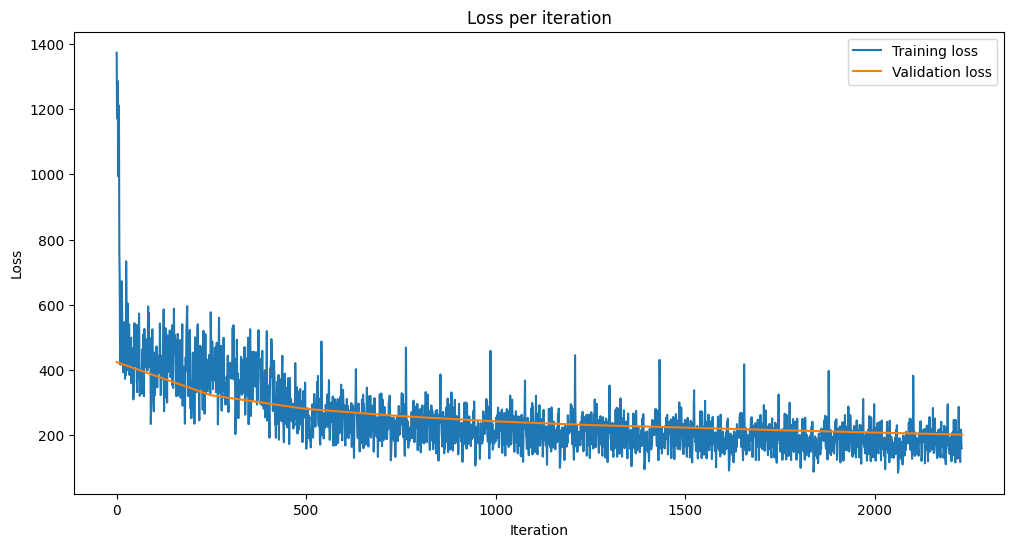

In [11]:
plt.figure(0, figsize = (12,6))
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(np.linspace(0,len(train_loss),epochs), val_loss)
plt.legend(["Training loss","Validation loss"])
print('Final validation loss:',val_loss[-1])

In [12]:
test_dataloader = MultimodalDataset(data_dict2['x_test'], data_dict2['y_test'],32, False, "data/images/")
mse_list = []
mae_list = []
for _ in range(test_dataloader.num_batches_per_epoch):
    test_batch = test_dataloader.fetch_batch()
    
        
    y_np = test_batch['y_batch'].values.astype(np.float32)
    y_tensor = torch.tensor(y_np)
    model.eval()
    with torch.no_grad():
        yhat = model(test_batch['images'])
        mse = torch.nn.functional.mse_loss(yhat, y_tensor)
        mae = torch.nn.functional.l1_loss(yhat, y_tensor)
        mse_list.append(mse)
        mae_list.append(mae)
mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)

Metrics for image model

In [14]:
print(f"mean squared error: {mse_mean}")
print(f"mean absolute error: {mae_mean}")

mean squared error: 194.54049682617188
mean absolute error: 11.025582313537598


Multimodal analysis

In [17]:
model1 = CNNRegressor(1)
optimizer1 = torch.optim.Adam(model.parameters(), lr = 1e-3)
model2 = FullyConnectedNetwork(8, 64)
optimizer2 = torch.optim.Adam(model.parameters(), lr = 1e-3)
checkpoint2 = torch.load("model_checkpoints/multimodal_model.pt")
print(checkpoint.keys())

model1.load_state_dict(checkpoint2['model1_state_dict'])
optimizer1.load_state_dict(checkpoint2['optimizer1_state_dict'])
model2.load_state_dict(checkpoint2['model2_state_dict'])
optimizer2.load_state_dict(checkpoint2['optimizer2_state_dict'])
val1_loss = checkpoint2['validation_loss']
train1_loss = checkpoint2['training_loss']
epochs1 = checkpoint2['epoch']

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'training_loss', 'validation_loss'])


Loss Curve

Final validation loss: 301.4729


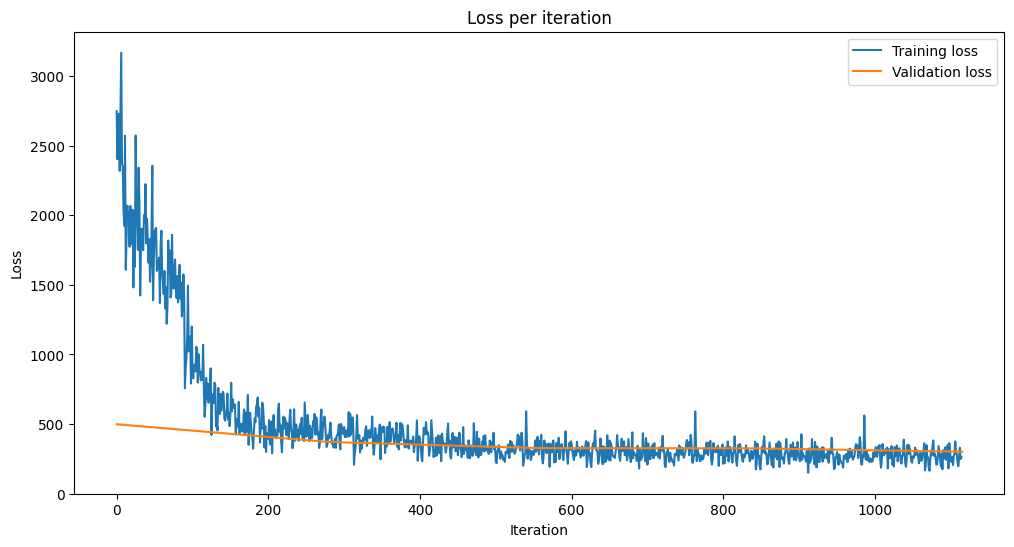

In [18]:
plt.figure(0, figsize = (12,6))
plt.title('Loss per iteration')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.plot(train1_loss)
plt.plot(np.linspace(0,len(train1_loss),epochs), val1_loss)
plt.legend(["Training loss","Validation loss"])
print('Final validation loss:',val_loss[-1])

In [20]:
test_dataloader = MultimodalDataset(data_dict2['x_test'], data_dict2['y_test'],32, False, "data/images/")
mse_list = []
mae_list = []
for _ in range(test_dataloader.num_batches_per_epoch):
    test_batch = test_dataloader.fetch_batch()
    
        
    y_np = test_batch['y_batch'].values.astype(np.float32)
    y_tensor = torch.tensor(y_np)
    model1.eval()
    model2.eval()
    with torch.no_grad():
        yhat1 = model1(test_batch['images'])
        yhat2 = model2(torch.Tensor(test_batch['x_batch'].to_numpy()))
        mse1 = torch.nn.functional.mse_loss(yhat1, y_tensor)
        mae1 = torch.nn.functional.l1_loss(yhat1, y_tensor)
        mse2 = torch.nn.functional.mse_loss(yhat2, y_tensor)
        mae2 = torch.nn.functional.l1_loss(yhat2, y_tensor)
        mse_list.append((mse1+mse2)/2)
        mae_list.append((mae1+mae2)/2)
mse_mean = np.mean(mse_list)
mae_mean = np.mean(mae_list)

In [21]:
print(f"mean squared error: {mse_mean}")
print(f"mean absolute error: {mae_mean}")

mean squared error: 149.41847229003906
mean absolute error: 9.209399223327637


Baseline Model

In [ ]:
from sklearn.dummy import DummyRegressor
mean_baseline = DummyRegressor(strategy='mean')
